In [38]:
import pandas as pd
import os 
import numpy as np
import sys
import pickle as pickle
import dill as dill
import matplotlib.pyplot as plt

# Increase the recursion limit
sys.setrecursionlimit(10000)  # Example value, adjust as needed

In [69]:
powerLawPath = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/PowerLawResults'
files = os.listdir(powerLawPath)
figures_destination = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'

In [4]:
fileIdx = 1
fileIdxpath = os.path.join(powerLawPath, files[fileIdx])
print(fileIdxpath)

/home/ak/Documents/Research/Papers/StylisedFactsPaper/PowerLawResults/powerLaw_KE1_fitted_model.pkl


In [21]:
import dill as pickle
symbolsPowerLawDict = dict()
# file_path = 'your_file.pkl'

# with open(file_path, 'rb') as file:
#     data = pickle.load(file)
for fileIdx in range(0,11):
    fileIdxpath = os.path.join(powerLawPath, files[fileIdx])
    print(files[fileIdx].split("_")[1])

    with open(fileIdxpath, 'rb') as file:
        data = pickle.load(file)
        symbolsPowerLawDict[files[fileIdx].split("_")[1]] = data
  

# Now 'data' contains your unpickled object


OE1
KE1
FB1
DU1
XM1
US1
G
JB1
TY1
YM1
FV1


{'OE1': {'alpha': 1.1450190813846373,
  'sigma': 0.0008882178849827406,
  'xmin': 0.02390438247011952,
  'xmax': None,
  'xmin_distance': 'D',
  'alpha_std_err': 0.0008882178849827406,
  'distribution': 'power_law',
  'D': 0.17220346940261722,
  'n': 26657.0,
  'n_tail': 26657.0,
  'loglikelihood': -31587.40021500757},
 'KE1': {'alpha': 1.147249369962648,
  'sigma': 0.0055496694407083215,
  'xmin': 0.02385107620709715,
  'xmax': None,
  'xmin_distance': 'D',
  'alpha_std_err': 0.0055496694407083215,
  'distribution': 'power_law',
  'D': 0.16741771761315505,
  'n': 704.0,
  'n_tail': 704.0,
  'loglikelihood': -809.521560134252},
 'FB1': {'alpha': nan,
  'sigma': nan,
  'xmin': nan,
  'xmax': None,
  'xmin_distance': 'D',
  'alpha_std_err': nan,
  'distribution': 'power_law',
  'D': nan,
  'n': 0.0,
  'n_tail': 0.0,
  'loglikelihood': -0.0},
 'DU1': {'alpha': 1.141859683105081,
  'sigma': 0.0016421100707565146,
  'xmin': 0.022819179664933565,
  'xmax': None,
  'xmin_distance': 'D',
  'al

In [24]:
# Converting the nested dictionary to DataFrame
df = pd.DataFrame.from_dict(symbolsPowerLawDict, orient='index')

In [30]:
df = df.drop('FB1')

In [33]:
df = df.drop('TY1')

In [47]:
print(df.round(2).to_latex(column_format='lcccccccc', escape=False, multicolumn_format='c'))

\begin{tabular}{lcccccccc}
\toprule
{} &  alpha &  sigma &  xmin &  xmax & xmin_distance &  alpha_std_err & distribution &     D &        n &   n_tail &  loglikelihood \\
\midrule
OE1 &   1.15 &   0.00 &  0.02 &  None &             D &           0.00 &    power_law &  0.17 &  26657.0 &  26657.0 &      -31587.40 \\
KE1 &   1.15 &   0.01 &  0.02 &  None &             D &           0.01 &    power_law &  0.17 &    704.0 &    704.0 &        -809.52 \\
DU1 &   1.14 &   0.00 &  0.02 &  None &             D &           0.00 &    power_law &  0.17 &   7463.0 &   7463.0 &       -8813.25 \\
XM1 &   1.11 &   0.01 &  0.01 &  None &             D &           0.01 &    power_law &  0.16 &    151.0 &    151.0 &        -158.81 \\
US1 &   1.16 &   0.01 &  0.03 &  None &             D &           0.01 &    power_law &  0.17 &    307.0 &    307.0 &        -352.86 \\
G   &   2.13 &   0.80 &  0.27 &  None &             D &           0.80 &    power_law &  0.11 &      2.0 &      2.0 &          -0.65 \\
JB1 

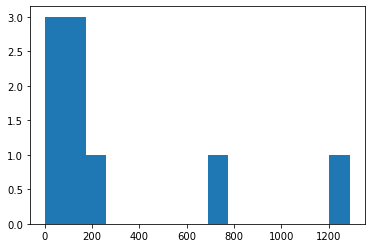

In [43]:
_=plt.hist(df['alpha']/df['sigma'], bins =15)

/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


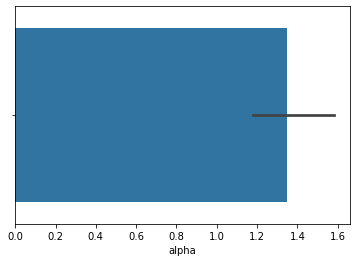

In [45]:
import seaborn as sns
sns.barplot(df['alpha'])

In [46]:
df

,alpha,sigma,xmin,xmax,xmin_distance,alpha_std_err,distribution,D,n,n_tail,loglikelihood
OE1,1.145019,0.000888,0.023904,None,D,0.000888,power_law,0.172203,26657.0,26657.0,-31587.400215
KE1,1.147249,0.005550,0.023851,None,D,0.005550,power_law,0.167418,704.0,704.0,-809.521560
DU1,1.141860,0.001642,0.022819,None,D,0.001642,power_law,0.173291,7463.0,7463.0,-8813.245971
XM1,1.111476,0.009072,0.012629,None,D,0.009072,power_law,0.158898,151.0,151.0,-158.805347
US1,1.161208,0.009201,0.028398,None,D,0.009201,power_law,0.173683,307.0,307.0,-352.856482
G,2.131709,0.800239,0.266646,None,D,0.800239,power_law,0.108336,2.0,2.0,-0.651516
JB1,1.529435,0.374367,0.081707,None,D,0.374367,power_law,0.071539,2.0,2.0,-0.695317
YM1,1.638273,0.451327,0.116088,None,D,0.451327,power_law,0.066480,2.0,2.0,-0.721716
FV1,1.148632,0.009218,0.023369,None,D,0.009218,power_law,0.181185,260.0,260.0,-288.194939


In [53]:

# Resetting the index to make 'Symbols' a column
df_reset = df.reset_index()
# df_reset.columns = ['Symbols', 'alpha']

# # Creating a boxplot for the alpha variable
# plt.figure(figsize=(10, 6))
# 
# plt.title('Boxplot of Alpha Values by Symbol')
# plt.xlabel('Symbols')
# plt.ylabel('Alpha')
# plt.show()

In [64]:
# plot parametrisations
import matplotlib as mpl
latex_styles = os.listdir(mpl.get_configdir())
latex_styles

plt.style.use(os.path.join(mpl.get_configdir(), latex_styles[0]))

In [65]:
df_reset = df.reset_index()

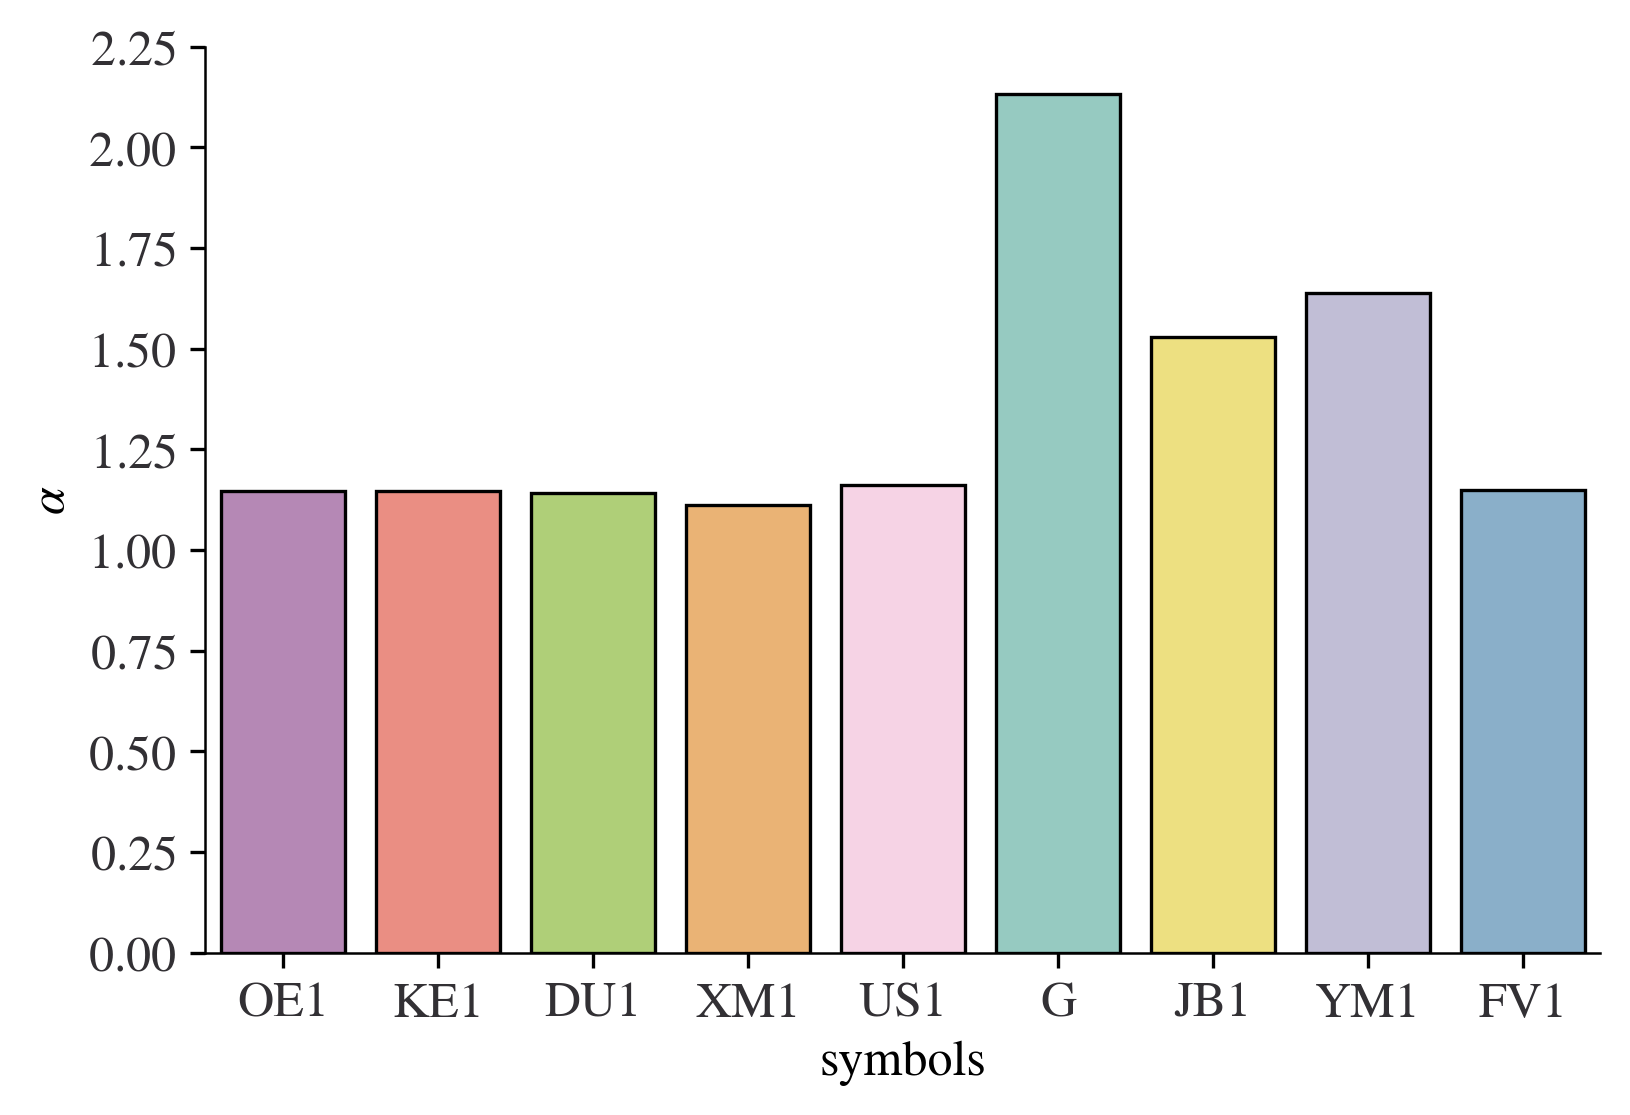

In [70]:
_=sns.barplot(x='index', y='alpha', data=df_reset)
plt.xlabel('symbols')
plt.ylabel(r'$\alpha$') 
title_file = 'powerlaw_tails.png'
fig_location = os.path.join(figures_destination, title_file)
plt.savefig(fig_location)
plt.show()